## Principal Component Analysis Notebook
F. Burkholder

### Set-up

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# use ggplot style
plt.style.use('ggplot')

In [3]:
# respect for the audience
import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

# example of keyword argument unpacking
matplotlib.rc('font', **font)

## How-to-PCA
1) Standardize columns  
2) Create covariance (correlation if standardized) matrix  
3) Find the eigenvectors and eigenvalues of the covariance/correlation matrix  
4) The eigenvectors are the principal components  

In [4]:
# create a simple linear dataset
m = 2 # slope
b = 0 # intercept
x1 = np.random.uniform(-5, 5, size = 20)
x2 = m * x1 + b

# reshape to column vectors or arbitrary length
x1 = x1.reshape((-1,1)) 
x2 = x2.reshape((-1,1))

# make it into a matrix
X = np.hstack((x1, x2))

print("x1\tx2")
for x1, x2 in X:
    print("{0:0.1f}\t{1:0.1f}".format(x1, x2))

x1	x2
4.6	9.2
-4.4	-8.9
-1.0	-2.1
-3.7	-7.5
-3.2	-6.4
-2.4	-4.8
0.1	0.2
2.2	4.5
0.6	1.2
3.7	7.5
2.4	4.8
0.5	0.9
4.7	9.4
-2.2	-4.4
4.3	8.6
3.3	6.5
-0.4	-0.7
-3.2	-6.4
-0.6	-1.2
3.8	7.7


In [5]:
print(X)

[[ 4.61617639  9.23235277]
 [-4.4353717  -8.87074339]
 [-1.03316977 -2.06633955]
 [-3.74503875 -7.49007751]
 [-3.18469929 -6.36939859]
 [-2.41418891 -4.82837781]
 [ 0.07920741  0.15841483]
 [ 2.24247392  4.48494785]
 [ 0.58222314  1.16444627]
 [ 3.74245164  7.48490328]
 [ 2.39990527  4.79981054]
 [ 0.46867494  0.93734989]
 [ 4.69130669  9.38261337]
 [-2.18529026 -4.37058052]
 [ 4.28828881  8.57657761]
 [ 3.25847507  6.51695014]
 [-0.35836468 -0.71672937]
 [-3.21944377 -6.43888753]
 [-0.5917669  -1.1835338 ]
 [ 3.84196209  7.68392419]]


### Standardize

In [6]:
print("Column means: ", X.mean(axis=0)) # average of the columns
print("Column stddevs: ", X.std(axis=0, ddof=1)) # std dev. of the columns

Column means:  [0.45219057 0.90438113]
Column stddevs:  [3.03236561 6.06473122]


In [10]:
# standardize using numpy
X_std = (X - X.mean(axis=0))/X.std(axis=0, ddof=1)
print(X_std) #ugh, so many digits

[[ 1.37318066  1.37318066]
 [-1.61179847 -1.61179847]
 [-0.48983551 -0.48983551]
 [-1.38414356 -1.38414356]
 [-1.19935731 -1.19935731]
 [-0.94526183 -0.94526183]
 [-0.12300072 -0.12300072]
 [ 0.59039166  0.59039166]
 [ 0.04288156  0.04288156]
 [ 1.08504762  1.08504762]
 [ 0.64230866  0.64230866]
 [ 0.00543614  0.00543614]
 [ 1.3979568   1.3979568 ]
 [-0.86977666 -0.86977666]
 [ 1.26505136  1.26505136]
 [ 0.92544398  0.92544398]
 [-0.26730129 -0.26730129]
 [-1.21081519 -1.21081519]
 [-0.34427163 -0.34427163]
 [ 1.11786373  1.11786373]]


In [11]:
# check that column means are 0, standard deviation of 1
print(X_std.mean(axis=0))
print(X_std.std(axis=0, ddof=1))

[-5.55111512e-17 -5.55111512e-17]
[1. 1.]


In [12]:
# could also use sklearn's standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X)
print("The means of the columns in X are: {0}".format(scaler.mean_.round(2)))
print("The standard deviations of the columns in X are: {0}".format(np.sqrt(scaler.var_).round(2)))

The means of the columns in X are: [0.45 0.9 ]
The standard deviations of the columns in X are: [2.96 5.91]


In [13]:
# make sure data is standardized
X_std_ss = scaler.transform(X)
print(X_std_ss.mean(axis=0))
print(X_std_ss.std(axis=0, ddof=1)) #wat

[-3.33066907e-17 -3.33066907e-17]
[1.02597835 1.02597835]


In [14]:
print(X_std_ss.std(axis=0, ddof=0)) #oh

[1. 1.]


Apparently standard scalar calculates variance only for a population, not a sample.

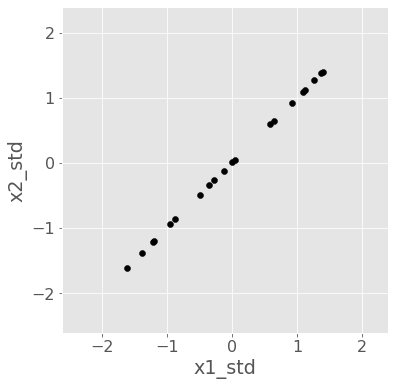

In [15]:
# Ok back from standardizing
# plot it
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax.scatter(X_std[:,0], X_std[:,1], marker='o', color='k')
ax.set_xlabel('x1_std')
ax.set_ylabel('x2_std')
low = X_std.min() - 1
high = X_std.max() + 1
ax.set_xlim([low, high])
ax.set_ylim([low, high])
ax.set_aspect('equal');

### Create covariance/correlation matrix
Covariance if just de-meaned, correlation if standardized too (more typical).

In [16]:
N = X.shape[0]
A = 1/(N-1)*np.dot(X_std.T, X_std)

In [17]:
print(A)

[[1. 1.]
 [1. 1.]]


### Find the eigenvectors and eigenvalues (with numpy)
See [documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.eig.html).  Structure of the returned eigenvectors is not intuitive.

In [18]:
eig_vals, eig_vecs = np.linalg.eig(A)

In [19]:
eig_vals

array([ 2.00000000e+00, -2.22044605e-16])

In [18]:
eig_vecs

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [20]:
# will keep only the first eigenvector, associated with eigenvalue 2
pc1 = np.array([[eig_vecs[0][0], eig_vecs[1][0]]]).T
print(pc1)

[[0.70710678]
 [0.70710678]]


See [here](https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com) for reconstructing your data matrix from principal components manually (in numpy).

### Use sklearn - example on the Iris dataset
Iris dataset described [here](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [2]:
# Adapted from code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features (there are a total of 4)
y = iris.target

print("X\t\ty")
for rowX, rowy in zip(X,y):
    print("{0}\t{1}".format(rowX, rowy))

X		y
[5.1 3.5]	0
[4.9 3. ]	0
[4.7 3.2]	0
[4.6 3.1]	0
[5.  3.6]	0
[5.4 3.9]	0
[4.6 3.4]	0
[5.  3.4]	0
[4.4 2.9]	0
[4.9 3.1]	0
[5.4 3.7]	0
[4.8 3.4]	0
[4.8 3. ]	0
[4.3 3. ]	0
[5.8 4. ]	0
[5.7 4.4]	0
[5.4 3.9]	0
[5.1 3.5]	0
[5.7 3.8]	0
[5.1 3.8]	0
[5.4 3.4]	0
[5.1 3.7]	0
[4.6 3.6]	0
[5.1 3.3]	0
[4.8 3.4]	0
[5. 3.]	0
[5.  3.4]	0
[5.2 3.5]	0
[5.2 3.4]	0
[4.7 3.2]	0
[4.8 3.1]	0
[5.4 3.4]	0
[5.2 4.1]	0
[5.5 4.2]	0
[4.9 3.1]	0
[5.  3.2]	0
[5.5 3.5]	0
[4.9 3.6]	0
[4.4 3. ]	0
[5.1 3.4]	0
[5.  3.5]	0
[4.5 2.3]	0
[4.4 3.2]	0
[5.  3.5]	0
[5.1 3.8]	0
[4.8 3. ]	0
[5.1 3.8]	0
[4.6 3.2]	0
[5.3 3.7]	0
[5.  3.3]	0
[7.  3.2]	1
[6.4 3.2]	1
[6.9 3.1]	1
[5.5 2.3]	1
[6.5 2.8]	1
[5.7 2.8]	1
[6.3 3.3]	1
[4.9 2.4]	1
[6.6 2.9]	1
[5.2 2.7]	1
[5. 2.]	1
[5.9 3. ]	1
[6.  2.2]	1
[6.1 2.9]	1
[5.6 2.9]	1
[6.7 3.1]	1
[5.6 3. ]	1
[5.8 2.7]	1
[6.2 2.2]	1
[5.6 2.5]	1
[5.9 3.2]	1
[6.1 2.8]	1
[6.3 2.5]	1
[6.1 2.8]	1
[6.4 2.9]	1
[6.6 3. ]	1
[6.8 2.8]	1
[6.7 3. ]	1
[6.  2.9]	1
[5.7 2.6]	1
[5.5 2.4]	1
[5.5 2.4]	1
[5.8 2.7]	1
[6.

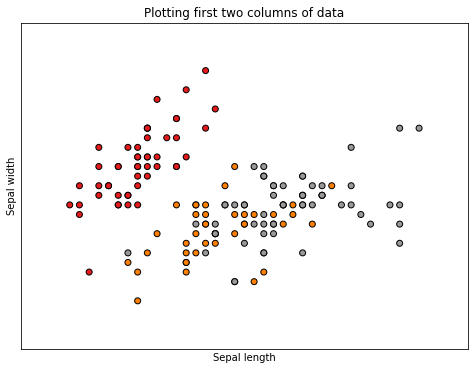

In [3]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

fig, ax = plt.subplots(figsize=(8,6))

# Plot the points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_title('Plotting first two columns of data')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(());

Above, when we just used the first two columns of data, we didn't see much separation of the classes in our 2d plot.  If we had done PCA first, where we used PCA to reduce it down to two dimensions, maybe we'd see more separation...

In [10]:
# see a 2d representation of the data using PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)


print("First 3 rows of the iris data:")
print("X1\tX2\tX3\tX4")
for i in range(3):
    print("{0}\t{1}\t{2}\t{3}".format(iris.data[i,0], iris.data[i,1], iris.data[i,2], iris.data[i,3]))

X_scaled = scaler.fit_transform(iris.data) # standardize data

print("First 3 rows of the iris data:")
print("X1_s\tX2_s\tX3_s\tX4_s")
for i in range(3):
    print("{0:0.1f}\t{1:0.1f}\t{2:0.1f}\t{3:0.1f}".format(X_scaled[i,0], X_scaled[i,1], X_scaled[i,2], X_scaled[i,3]))


pca = PCA(n_components=2) #pca object
X_pca = pca.fit_transform(X_scaled) # from 4 features to 2 PCA features

print("\nData after PCA into 2 components")
print("PC1\tPC2")
for i in range(3):
    print("{0:0.1f}\t{1:0.1f}".format(X_pca[i,0], X_pca[i,1]))

First 3 rows of the iris data:
X1	X2	X3	X4
5.1	3.5	1.4	0.2
4.9	3.0	1.4	0.2
4.7	3.2	1.3	0.2
First 3 rows of the iris data:
X1_s	X2_s	X3_s	X4_s
-0.9	1.0	-1.3	-1.3
-1.1	-0.1	-1.3	-1.3
-1.4	0.3	-1.4	-1.3

Data after PCA into 2 components
PC1	PC2
-2.3	0.5
-2.1	-0.7
-2.4	-0.3


In [14]:
# How are each of the 2 principal components defined?
# Here are the loadings (how the original features load on to the principal components)
pca.components_.round(2)

array([[ 0.52, -0.27,  0.58,  0.56],
       [ 0.38,  0.92,  0.02,  0.07]])

The 1st principal component is 0.52 $\cdot$ X1 + -0.26 $\cdot$ X2 + 0.58 $\cdot$ X3 + 0.57 $\cdot$ X4  
The 2nd principal component is 0.37 $\cdot$ X1 + 0.93 $\cdot$ X2 + 0.02 $\cdot$ X3 + 0.07 $\cdot$ X4

In [25]:
# Are these components orthogonal?  (They should be!)
np.dot(pca.components_[0], pca.components_[1])

-3.400058012914542e-16

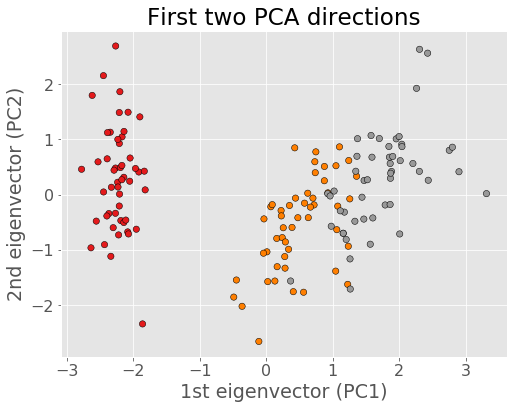

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)");

By using features derived from linear combinations of all the features, this PCA 2d representation does a better job showing the structure in the data (the separations of the classes) than just using any two features.  

But did we make a sacrifice by going down to two dimensions (from four) using PCA?

In [27]:
evr = pca.explained_variance_ratio_
print(evr)
print("The 2 principal components explain {0:0.1f}%"
      " of the variance in the original data.".format(evr.sum()*100))

[0.72962445 0.22850762]
The 2 principal components explain 95.8% of the variance in the original data.


^ That's really good!  A rule of thumb is to pick your number of components to explain at least 90% of the variance in the data.

### Scree plots (how to pick the number of principal components)

In [28]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition, datasets

pca = decomposition.PCA() # not setting number of components, which means we keep them all!

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

print("There are {0} rows of data.".format(X_digits.shape[0]))

There are 1797 rows of data.


[ 0.  0.  0.  0. 14. 13.  1.  0.  0.  0.  0.  5. 16. 16.  2.  0.  0.  0.
  0. 14. 16. 12.  0.  0.  0.  1. 10. 16. 16. 12.  0.  0.  0.  3. 12. 14.
 16.  9.  0.  0.  0.  0.  0.  5. 16. 15.  0.  0.  0.  0.  0.  4. 16. 14.
  0.  0.  0.  0.  0.  1. 13. 16.  1.  0.]

The images are (64,) in shape.

Each value in the image is of type <class 'numpy.float64'>
(Though they look a lot like 4 bit numbers.)

Number in image:  1


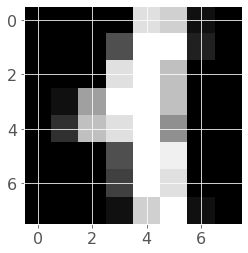

In [31]:
# look at a digit and target
img = 11
print(X_digits[img])
print("\nThe images are {0} in shape.".format(X_digits[img].shape))
print("\nEach value in the image is of type {0}".format(type(X_digits[img][0])))
print("(Though they look a lot like 4 bit numbers.)")
plt.imshow(X_digits[img].reshape((8,8)), cmap='gray')
print("\nNumber in image: ", y_digits[img])

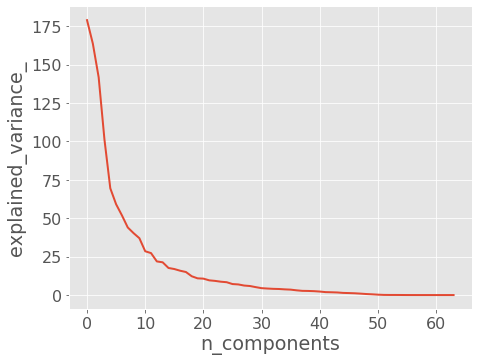

In [32]:
# not scaling, why?

# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_');

In [33]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

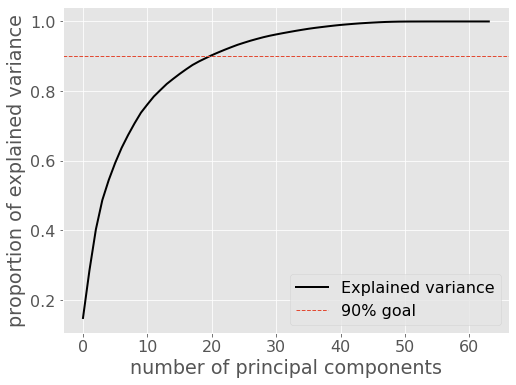

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(prop_var_expl, color = 'black', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', linewidth=1)
ax.set_ylabel('proportion of explained variance')
ax.set_xlabel('number of principal components')
ax.legend();

### Around 20 principal components explains about 90% of the variance in the handwritten digits.
So, we could train a model on just those 20 features, instead of the original 64, and do as well and maybe better!